## 1) Import modules

In [448]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

## 2) Load Data

In [449]:
# Reading the data
X = pd.read_csv('Cleaned Data/X.csv',  index_col='id')
Y = pd.read_csv('Cleaned Data/Y.csv',  index_col='id', squeeze=True) # squeezes DF into Series
X_test = pd.read_csv('Cleaned Data/X_test.csv',  index_col='id')

for data in [X,Y,X_test]:
    print('shape: ', data.shape)

shape:  (328, 278)
shape:  (328,)
shape:  (90, 278)


### Convert Continuous data to multiclass data

In [450]:
Y[Y>0] = 1

# See the distribution target column
print(Y.value_counts(normalize=True))

1.0    0.52439
0.0    0.47561
Name: playtime_forever, dtype: float64


## 3) Splitting the dataset into Training set and Test set

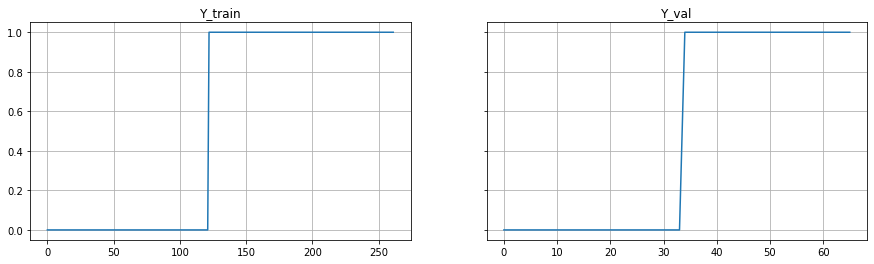

In [451]:
# Dataset split with stratification

X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.2, random_state=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4), sharey=True)
ax1.plot(np.sort(Y_train))
ax1.set_title('Y_train')
ax1.grid()

ax2.plot(np.sort(Y_val))
ax2.set_title('Y_val')
ax2.grid()

plt.show()

## 4) Feature Selection (WrapperMethod)

In [452]:
model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
rfe = RFE(model, 40)
fit = rfe.fit(X, Y)
best_features = X.columns[fit.support_].tolist()
print(best_features)

# best_features = ['purchase_date_year', 'purchase_date_month', 'tags_puzzle', 'tags_co-op', 'tags_sandbox', 
#                  'purchase_date_day', 'date_diff', 'tags_sci-fi', 'tags_point_&_click', 'price', 'release_date_month',
#                  'release_date_year', 'tags_open_world', 'total_positive_reviews', 'release_date_timestamp', 
#                  'tags_casual', 'tags_massively_multiplayer', 'total_negative_reviews', 'tags_rpg', 'genres_rpg', 
#                  'tags_horror', 'release_date_day', 'purchase_date_timestamp', 'tags_simulation']

['tags_horror', 'release_date_month', 'tags_multiplayer', 'genres_action', 'purchase_date_month', 'categories_shared/split_screen', 'tags_rpg', 'purchase_date_timestamp', 'tags_gore', 'tags_difficult', 'purchase_date_year', 'tags_online_co-op', 'tags_open_world', 'price', 'tags_sci-fi', 'categories_co-op', 'tags_massively_multiplayer', 'tags_local_co-op', 'genres_casual', 'tags_survival', 'tags_sandbox', 'release_date_timestamp', 'tags_casual', 'total_positive_reviews', 'release_date_day', 'purchase_date_day', 'date_diff', 'genres_rpg', 'tags_simulation', 'categories_steam_trading_cards', 'tags_classic', 'is_free', 'tags_co-op', 'tags_funny', 'tags_early_access', 'tags_puzzle', 'release_date_year', 'tags_point_&_click', 'tags_vr', 'total_negative_reviews']


In [453]:
X_train = X_train[best_features].copy()
X_val = X_val[best_features].copy()

X_test = X_test[best_features].copy()

X_train.head()

,tags_horror,release_date_month,tags_multiplayer,genres_action,purchase_date_month,categories_shared/split_screen,tags_rpg,purchase_date_timestamp,tags_gore,tags_difficult,purchase_date_year,tags_online_co-op,tags_open_world,price,tags_sci-fi,categories_co-op,tags_massively_multiplayer,tags_local_co-op,genres_casual,tags_survival,tags_sandbox,release_date_timestamp,tags_casual,total_positive_reviews,release_date_day,purchase_date_day,date_diff,genres_rpg,tags_simulation,categories_steam_trading_cards,tags_classic,is_free,tags_co-op,tags_funny,tags_early_access,tags_puzzle,release_date_year,tags_point_&_click,tags_vr,total_negative_reviews
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,8,0,0,11,0,1,1.480118e+09,0,0,2016,0,0,0.0,0,0,0,0,0,0,0,1.439338e+09,0,3.178054,12,26,472,1,0,0,0,1,0,0,0,0,2015,0,0,0.000000
298,1,3,0,0,11,0,1,1.542758e+09,0,0,2018,0,0,9800.0,0,0,0,0,0,0,0,1.520899e+09,0,7.175490,13,21,253,1,0,1,0,0,0,0,0,1,2018,1,0,5.556828
8,0,10,0,1,12,0,0,1.513901e+09,0,0,2017,0,0,8800.0,0,0,0,0,0,0,0,1.508198e+09,0,3.871201,17,22,66,0,0,0,0,0,0,0,0,1,2017,0,1,2.484907
213,0,1,1,1,4,1,1,1.491782e+09,0,1,2017,1,0,3600.0,0,1,0,1,0,0,0,1.295914e+09,0,9.426419,25,10,2267,1,0,1,0,0,1,1,0,0,2011,0,0,7.196687
101,0,11,1,1,4,0,0,1.555200e+09,1,0,2019,0,0,7000.0,0,0,0,0,0,1,0,1.510790e+09,0,8.048788,16,14,514,0,1,1,0,0,1,0,1,0,2017,0,0,6.390241


## 5) Fit & Evaluation

In [454]:
parameters_for_testing = {
   "max_depth":[1,2,3],
    "gamma":[1,2,3],
    "eta":[0.5,0.8,1.0],
    "reg_alpha":[0.1,0.5,1],
    "reg_lambda":[0.1,0.5,1]
}

gs=GridSearchCV(XGBClassifier(),param_grid=grid, scoring='neg_mean_squared_error',cv=3,n_jobs = -1, verbose = 2)
gs.fit(X[X_test.columns],Y)

final_model = gs.best_estimator_
print(final_model)

# final_model = XGBClassifier(C=0.001, base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, gamma=0,
#               learning_rate=0.1, max_delta_step=0, max_depth=3,
#               min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
#               nthread=None, objective='binary:logistic', penalty='l1',
#               random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
#               seed=None, silent=None, subsample=1, verbosity=1)

final_model.fit(X_train, Y_train)
Y_pred = final_model.predict(X_val)

print("Accuracy:",metrics.accuracy_score(Y_val, Y_pred))
print(metrics.confusion_matrix(Y_val, Y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


XGBClassifier(C=0.001, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', penalty='l1',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)
Accuracy: 0.7575757575757576
[[27  7]
 [ 9 23]]


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished


## 6) Prediction on given Test Data

Score on Full set:  0.9817073170731707
------------------------------------------------------


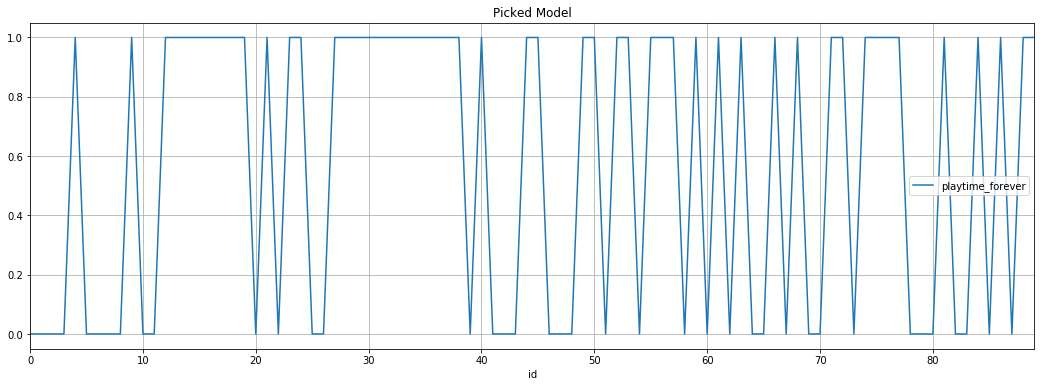

In [455]:
final_model.fit(X[X_test.columns],Y)
actual_predicted = final_model.predict(X_test)

ind = [i for i in range(len(actual_predicted))]
predicted_df = pd.DataFrame(actual_predicted)
predicted_df.columns = ['playtime_forever']
predicted_df.index.name = 'id'

print('Score on Full set: ', final_model.score(X[X_test.columns],Y))
print('------------------------------------------------------')

predicted_df.plot(figsize=(18,6), grid = True, title='Picked Model')

In [456]:
predicted_df.to_csv('classification_result.csv')

In [457]:
predicted_df['playtime_forever'].value_counts()

1.0    51
0.0    39
Name: playtime_forever, dtype: int64